<a href="https://colab.research.google.com/github/kanovotn/freecodecamp-projects/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical data visualizer

This project comes from freecodecamp.org Data analytics course.

The purpose is to visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [113]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/datasets/medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [114]:
# Add 'overweight' column
df['overweight'] = df.apply(lambda x: 1 if (x['weight'] / ((x['height'] / 100) ** 2)) > 25 else 0, axis=1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [115]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Categorical plot based on presence or absence of cardiovascular disease

In [116]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [117]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')
df_cat.head()

,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


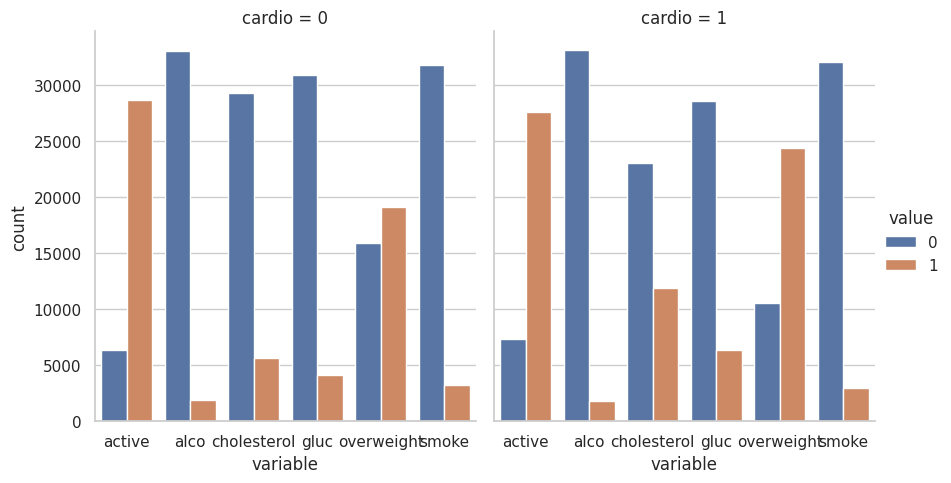

In [118]:
g = sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_cat, kind='bar', height=5, aspect=.9)
plt.savefig('catplot.png')


## Correlation matrix

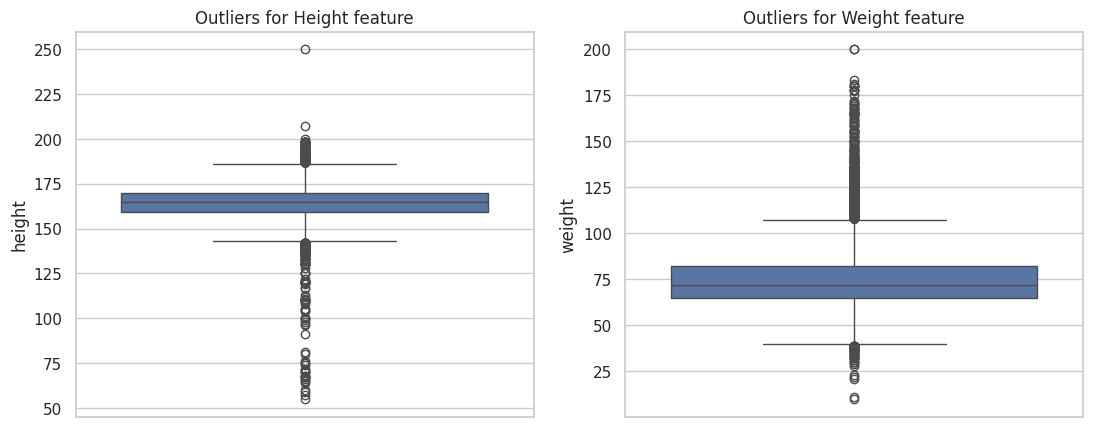

In [119]:
fig, axarr = plt.subplots(1, 2, figsize=(13,5))

sns.boxplot(df['height'], ax=axarr[0])
sns.boxplot(df['weight'], ax=axarr[1])

axarr[0].set_title('Outliers for Height feature')
axarr[1].set_title('Outliers for Weight feature')

plt.show()

### Clean the data


In [120]:
# Clean the data
df_heat = df[df['ap_lo'] <= df['ap_hi']]

df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]

df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

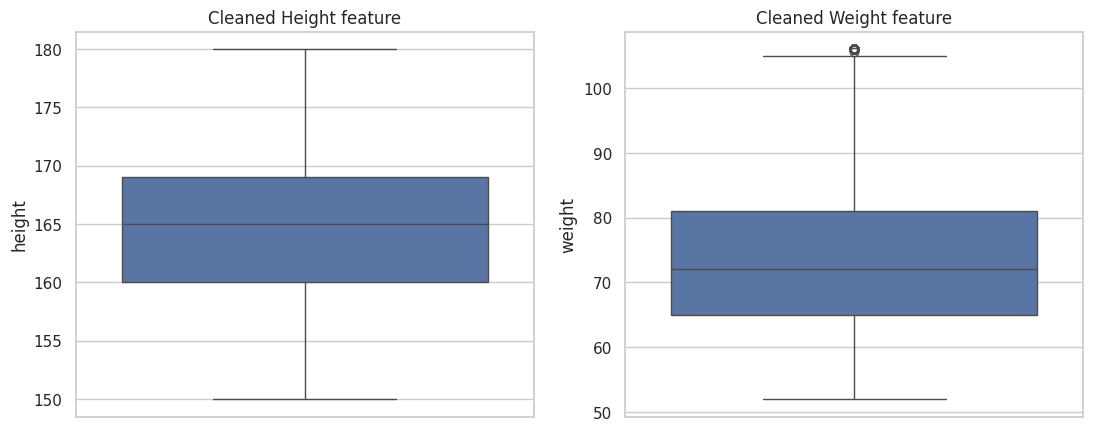

In [121]:
fig, axarr = plt.subplots(1, 2, figsize=(13,5))

sns.boxplot(df_heat['height'], ax=axarr[0])
sns.boxplot(df_heat['weight'], ax=axarr[1])

axarr[0].set_title('Cleaned Height feature')
axarr[1].set_title('Cleaned Weight feature')

plt.show()

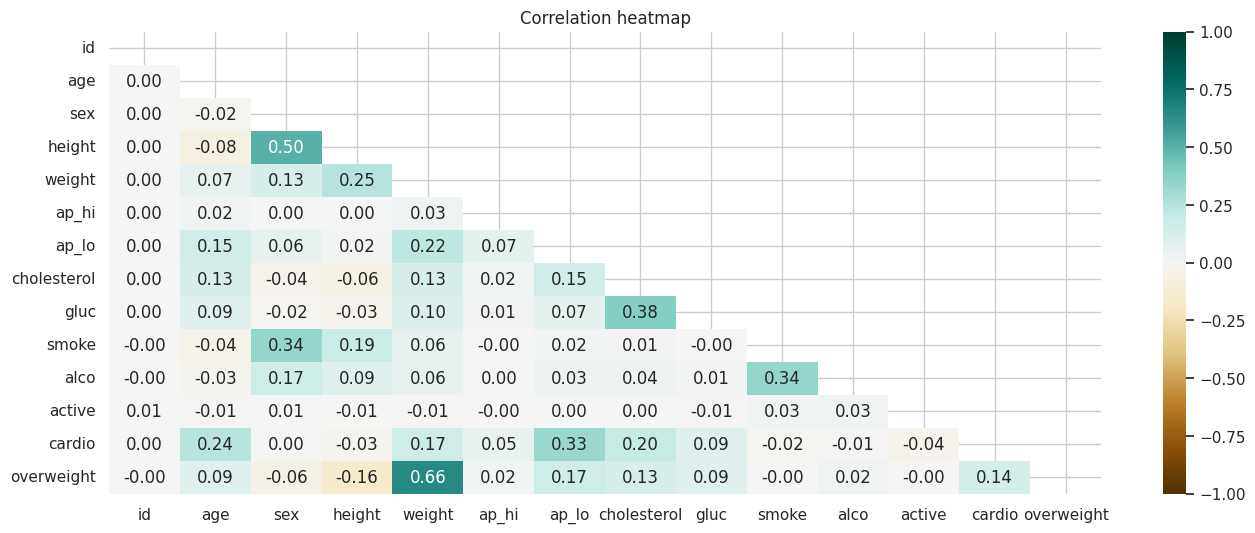

In [122]:
plt.figure(figsize=(16, 6))

# Calculate the correlation matrix
corr = df_heat.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='BrBG', mask=mask, vmax=1, vmin=-1)
heatmap.set_title("Correlation heatmap")
plt.savefig('heatplot.png')
plt.show()